# Урок 9. Линейная регрессия Логистическая регрессия

Импорт необходимых библиотек:

In [120]:
import numpy as np
import matplotlib.pyplot as plt

## Задача №1

_Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
**zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].**
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за **X** заработную плату (то есть, zp - признак),
а за **y** - значения скорингового балла (то есть, ks - целевая переменная).
Произвести расчет как с использованием intercept, так и без._

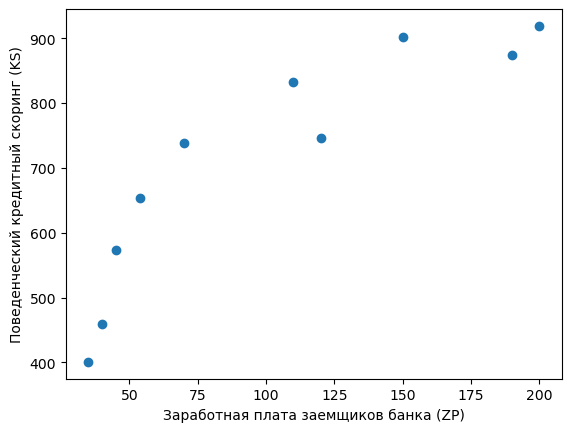

In [121]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp, ks)
plt.xlabel('Заработная плата заемщиков банка (ZP)')
plt.ylabel('Поведенческий кредитный скоринг (KS)', rotation=90)
plt.show()

На основании графика, делаем предположение о наличии линейной взаимосвязи.

### Определим с intercept


In [122]:
b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
print(f'b1 = {b1:.2f}')

b1 = 2.62


In [123]:
b0 = np.mean(ks) - b * np.mean(zp)
print(f'b0 = {b0:.2f}')

b0 = 683.58


In [124]:
y_pred = b0 + b1 * zp
print(f'y_pred = {y_pred}')

y_pred = [ 775.30271357  801.5081024  1181.48624034 1207.69162917  788.40540798
  867.02157446  825.09295234 1076.66468505  998.04851858  971.84312975]


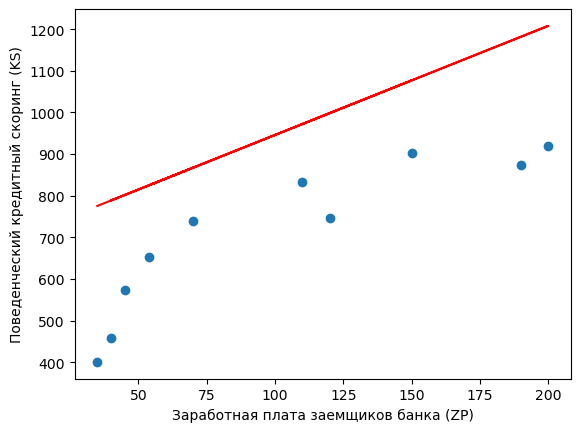

In [125]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred, 'r')
plt.xlabel('Заработная плата заемщиков банка (ZP)')
plt.ylabel('Поведенческий кредитный скоринг (KS)', rotation=90)
plt.show()

Расчет наглядно показывает линейную взаимосвязь между величиной заработной платы и значением кредитного скоринга заемщиков.

### Cредняя квадратичная ошибка

In [126]:
d = len(ks)
mse_ = np.sum(((b0 + b2 * zp) - ks) ** 2 / d)
print(f'mse_ = {mse_:.2f}')

mse_ = 369761.94


In [127]:
mse_ = ((ks - y_pred)**2).sum() / d
print(f'mse_ = {mse_:.2f}')

mse_ = 63785.88


### Определим без intercept

In [128]:
zp1 = zp.reshape(1, d)
ks1 = ks.reshape(1, d)

In [129]:
b2 = np.dot(np.dot(np.linalg.inv(np.dot(zp1, zp1.T)), zp1), ks1.T)[0][0]
print(f'b1 = {b2:.2f}')

b1 = 5.89


In [130]:
y_pred1 = b2 * zp
print(f'y_pred1 = {y_pred1}')

y_pred1 = [ 206.1437147   265.04191891 1119.06587983 1177.96408403  235.59281681
  412.28742941  318.05030269  883.47306302  706.77845042  647.88024621]


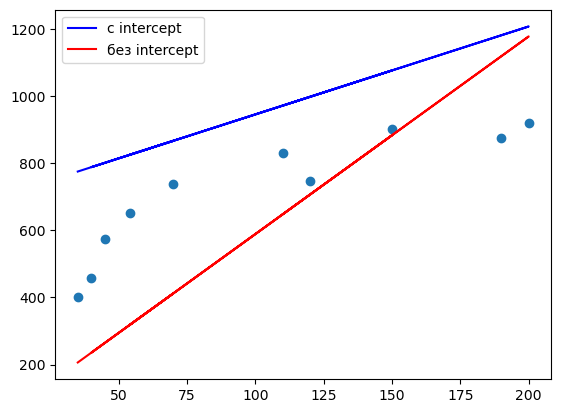

In [131]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred, 'b', label = 'с intercept')
plt.plot(zp, y_pred1, 'r', label = 'без intercept')
plt.legend()
plt.show()

## Задача №2

_Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept)._

Определим значение для вычисленного в Задаче №1 коэффициента **b**.

In [132]:
def mse_(b, y=ks, X=zp):
    return np.sum((b * X - y) ** 2) / len(X)

In [140]:
mse_(b1, ks, zp)

203763.93896082853

In [141]:
# производная функции потерь
def mse_loss_func(b, x, y):
    return (2 / len(x)) * np.sum((b * x - y) * x)

In [142]:
alpha = 1e-6
b = 0.1

# for i in range(1000):
#     fp = mse_loss_func(b, zp, ks)
#     b -= alpha * fp

mse_min = mse_(b, ks, zp)
i_min = 1
b_min = b

for i in range(1000):
    b -= alpha * mse_loss_func(b, ks, zp)
    if i % 100 == 0:
       print(f'Итерация: {i}, b: {b}, mse: {mse_(b) }')
    if mse_(b, ks, zp) > mse_min:
        print(f'-- Итерация №{i_min}, b: {b_min}, mse: {mse_min},'
              f'\nДостигнут минимум\nРезультат: {b_min}')
        break
    else:
        mse_min = mse_(b, ks, zp)
        i_min = i
        b_min = b

Итерация: 0, b: 0.15539802, mse: 509541.06580094283
-- Итерация №0, b: 0.15539802, mse: 509541.06580094283,
Достигнут минимум
Результат: 0.15539802


In [136]:
y_pred2 = b2 * zp
print(f'y_pred2 = {y_pred2}')

y_pred2 = [ 206.1437147   265.04191891 1119.06587983 1177.96408403  235.59281681
  412.28742941  318.05030269  883.47306302  706.77845042  647.88024621]


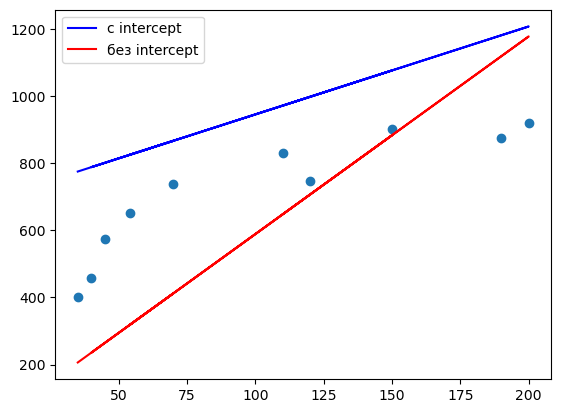

In [137]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred, 'b', label = 'с intercept')
plt.plot(zp, y_pred2, 'r', label = 'без intercept')
plt.legend()
plt.show()

## Задача №3

_Произвести вычисления как в пункте 2, но с вычислением intercept.
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно
(то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации)._